In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'diabetic-retinopathy-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2118574%2F3521043%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240415%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240415T143739Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Ddd4ac5fd5c93a09db8a03347c05f09b3f2b90ff33d6a56273eef9ba58bea03fbc8704b5ac0030511c39c49a02dd8ec35f35a8618c29dde673344c780973b1ed9de2ebe96b2ba8d504e77782fe5a5de51fa04097e15a07345f98b484cecab5de19eea7eef6d23fdd3e08c376fef0a08c295dc035158cc3ce5087b4c0c47ac2973e9f6099e77904336c38492593385dd034d26fb1fd7ecf5b28b3a50a405240425b47df03c4ff6d8a7f423e5e42fdf8cc0dbb5baac354bbacd4f17c067d988b26902c659582698404d7fa4a881124bd41cf36b0ea324b2399f931ac185408c5c8f76fbc5b8140c1db747080f6a83c39fd1e15034a96c310b447ea989e02c290c4f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================                                ] 135004160 bytes downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================   ] 347627520 bytes downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_185.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_53.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_52.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_146.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_76.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_28.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_56.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_126.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_177.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_87.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_51.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_57.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_116.png
/kaggle/input/diabetic-retinopathy-dataset/Severe DR/Severe DR_145.png
/kaggle/input/

In [3]:
# License: BSD

import time
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()   # interactive mode

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn

import torchvision # For Image Related Projects
from torchvision import datasets, models, transforms


from tempfile import TemporaryDirectory

cudnn.benchmark = True

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# Define transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
# Define dataset
dataset = datasets.ImageFolder(root='/kaggle/input/diabetic-retinopathy-dataset/', transform=transform)

# Extract class labels based on subfolder names
class_labels = dataset.classes

# Split dataset into train and test (80-20 split)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Define dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class_names = dataset.classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
print(train_loader)

In [6]:
print(class_names)

['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']


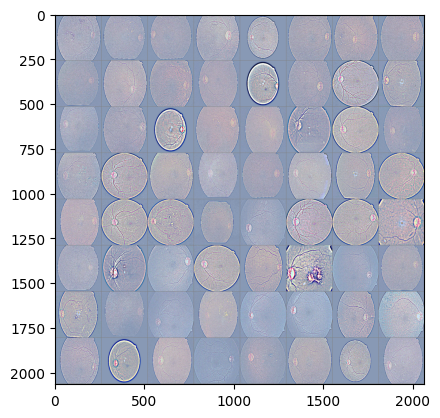

Severe DR Moderate DR Moderate DR Moderate DR


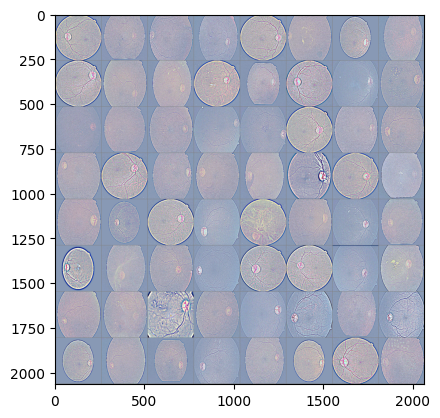

Healthy Moderate DR Healthy Moderate DR


In [7]:
# Define function to display sample images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display images
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))  # Display labels for the first 4 images

# Get some random testing images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Display images
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))  # Display labels for the first 4 images

In [8]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    # Define lists to store metrics
    train_loss_history = []
    train_acc_history = []
    test_loss_history = []
    test_acc_history = []
    best_acc =0
     # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)

        # Train the model

        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            correct_train = 0
            total_train = 0
            for i, (inputs, labels) in enumerate(train_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                _, predicted_train = torch.max(outputs, 1)
                total_train += labels.size(0)
                correct_train += (predicted_train == labels).sum().item()
            scheduler.step()
            train_loss = running_loss / len(train_loader)
            train_accuracy = 100 * correct_train / total_train
            train_loss_history.append(train_loss)
            train_acc_history.append(train_accuracy)

            print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%')

            # Evaluation on test data
            model.eval()
            correct_test = 0
            total_test = 0
            test_running_loss = 0.0
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    test_running_loss += loss.item()
                    _, predicted_test = torch.max(outputs, 1)
                    total_test += labels.size(0)
                    correct_test += (predicted_test == labels).sum().item()
            test_loss = test_running_loss / len(test_loader)
            test_accuracy = 100 * correct_test / total_test
            test_loss_history.append(test_loss)
            test_acc_history.append(test_accuracy)

            print(f'Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.2f}%')
            # Update learning rate
            scheduler.step()
            if test_accuracy > best_acc:
                best_acc = test_accuracy
                torch.save(model.state_dict(), best_model_params_path)
        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best Test Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    # Plot loss and accuracy curves
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Train')
    plt.plot(test_loss_history, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Train')
    plt.plot(test_acc_history, label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()

    plt.show()
    return model

In [9]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [10]:
!pip install torchsummary

In [11]:
model_ft = models.mobilenet_v2(weights='IMAGENET1K_V1')

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 103MB/s] 


In [12]:
from torchsummary import summary
model_ft = model_ft.to(device)
summary(model_ft, (3, 256, 256))
print(model_ft)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             864
       BatchNorm2d-2         [-1, 32, 128, 128]              64
             ReLU6-3         [-1, 32, 128, 128]               0
            Conv2d-4         [-1, 32, 128, 128]             288
       BatchNorm2d-5         [-1, 32, 128, 128]              64
             ReLU6-6         [-1, 32, 128, 128]               0
            Conv2d-7         [-1, 16, 128, 128]             512
       BatchNorm2d-8         [-1, 16, 128, 128]              32
  InvertedResidual-9         [-1, 16, 128, 128]               0
           Conv2d-10         [-1, 96, 128, 128]           1,536
      BatchNorm2d-11         [-1, 96, 128, 128]             192
            ReLU6-12         [-1, 96, 128, 128]               0
           Conv2d-13           [-1, 96, 64, 64]             864
      BatchNorm2d-14           [-1, 96,

In [13]:
no_class = 5
mobilenet = models.mobilenet_v2(weights='IMAGENET1K_V1')
#vgg16.load_state_dict(torch.load("../input/vgg16bn/vgg16_bn.pth"))
print(mobilenet.classifier[1].out_features) # 1000
# Freeze training for all layers
for param in mobilenet.features.parameters():
    param.require_grad = True
num_features = mobilenet.classifier[1].in_features
features = list(mobilenet.classifier.children())[:-1] # Remove last layer
features.extend([nn.Linear(num_features, no_class)]) # Add our layer with 4 outputs
mobilenet.classifier = nn.Sequential(*features) # Replace the model classifier

1000


In [14]:
mobilenet = mobilenet.to(device)
summary(mobilenet, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             864
       BatchNorm2d-2         [-1, 32, 128, 128]              64
             ReLU6-3         [-1, 32, 128, 128]               0
            Conv2d-4         [-1, 32, 128, 128]             288
       BatchNorm2d-5         [-1, 32, 128, 128]              64
             ReLU6-6         [-1, 32, 128, 128]               0
            Conv2d-7         [-1, 16, 128, 128]             512
       BatchNorm2d-8         [-1, 16, 128, 128]              32
  InvertedResidual-9         [-1, 16, 128, 128]               0
           Conv2d-10         [-1, 96, 128, 128]           1,536
      BatchNorm2d-11         [-1, 96, 128, 128]             192
            ReLU6-12         [-1, 96, 128, 128]               0
           Conv2d-13           [-1, 96, 64, 64]             864
      BatchNorm2d-14           [-1, 96,

In [15]:
#mobilenet = mobilenet.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(mobilenet.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Epoch [1/25], Training Loss: 1.1133, Training Accuracy: 57.68%
Testing Loss: 0.9297, Testing Accuracy: 62.36%
Epoch [2/25], Training Loss: 0.8058, Training Accuracy: 69.32%
Testing Loss: 0.8136, Testing Accuracy: 69.82%
Epoch [3/25], Training Loss: 0.6825, Training Accuracy: 73.18%
Testing Loss: 0.7290, Testing Accuracy: 69.27%
Epoch [4/25], Training Loss: 0.5995, Training Accuracy: 76.77%
Testing Loss: 0.7116, Testing Accuracy: 71.82%
Epoch [5/25], Training Loss: 0.5462, Training Accuracy: 78.77%
Testing Loss: 0.6879, Testing Accuracy: 71.82%
Epoch [6/25], Training Loss: 0.5226, Training Accuracy: 80.50%
Testing Loss: 0.6806, Testing Accuracy: 72.36%
Epoch [7/25], Training Loss: 0.5240, Training Accuracy: 80.23%
Testing Loss: 0.6738, Testing Accuracy: 72.91%
Epoch [8/25], Training Loss: 0.5214, Training Accuracy: 80.09%
Testing Loss: 0.6757, Testing Accuracy: 72.55%
Epoch [9/25], Training Loss: 0.5068, Training Accuracy: 80.27%
Testing Loss: 0.6737, Testing Accuracy: 72.73%
Epoch [10/

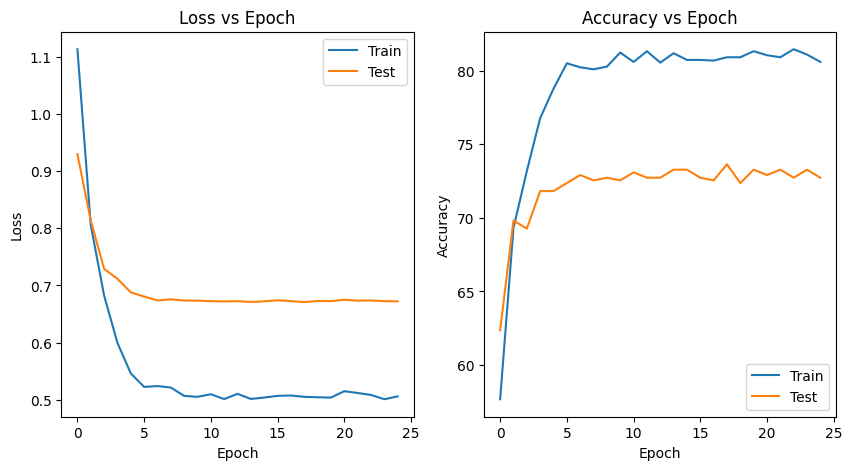

In [16]:
mobilenet = train_model(mobilenet, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

In [17]:
class_names

['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']

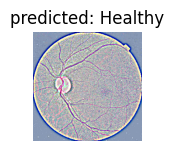

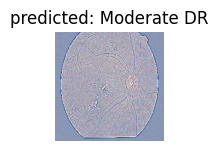

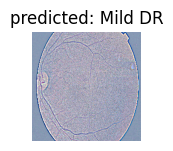

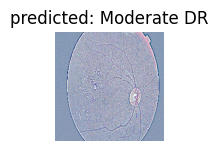

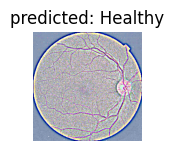

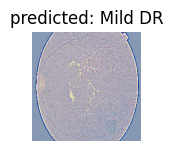

In [18]:
visualize_model(mobilenet)
plt.ioff()
plt.show()

In [19]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = transform(img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

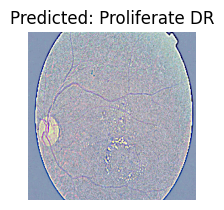

In [21]:
visualize_model_predictions(
    mobilenet,
    img_path='/kaggle/input/diabetic-retinopathy-dataset/Proliferate DR/Proliferate DR_225.png'
)

plt.ioff()
plt.show()